In [0]:
import matplotlib.pyplot as plt
import numpy as np

#Euler method
def Euler(xn,tn,dx):
  return xn + dx(xn,tn)*dt;

#Euler Cromer method
def EulerCromer(xn,tn,dx):
  arr=dx(xn,tn);
  arr2=np.array([]);
  for index in reversed(range(len(arr))):
    arr2=np.append(arr2,xn[index]+arr[index]*dt);
  arr2=np.flip(arr2);
  return arr2;

#Euler Richardson
def EulerRichardson(xn,tn,dx):
  xmid=xn+dx(xn,tn)*dt/2;
  return xn+dx(xmid,tn+dt/2)*dt;
  
#4th order Runge-Kutta
def RK4(xn,tn,dx):
  k1=dx(xn,tn);
  k2=dx(xn+dt/2*k1,tn+dt/2);
  k3=dx(xn+dt/2*k2,tn+dt/2);
  k4=dx(xn+dt*k3,tn+dt);
  return xn +dt*(k1+2*k2+2*k3+k4)/6;

#Numerical Solution
#By default, RK4 is chosen, but fell free to change the method.

def NDSolve(initv,tf,dt,dx,method='RK4',whenevent=None):
  #arrays to save the data calculated
  data=[];
  #initial values
  state=initv;
  #loop of the integration
  while(state[-1]<tf and (whenevent==None or whenevent(state))):
    data.append(state);
    #methods
    if method=='RK4':
      state=RK4(state,state[-1],dx);
    elif method=='Euler':
      state=Euler(state,state[-1],dx);
    elif method=='Euler-Cromer':
      state=EulerCromer(state,state[-1],dx);
    elif method=='Euler-Richardson':
      state=EulerRichardson(state,state[-1],dx);
    else:
      raise Exception('not valid method');
  return data;

def showResults(sol,xlabel,ylabel,title):
  plt.plot([state[-1] for state in sol],[state[0] for state in sol],'r--');
  plt.xlabel(xlabel);
  plt.ylabel(ylabel);
  plt.title(title);
  plt.show();



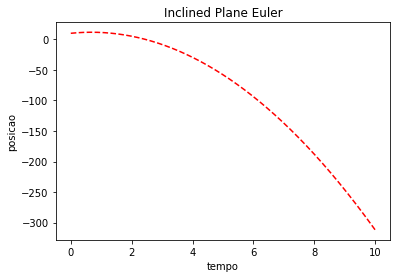

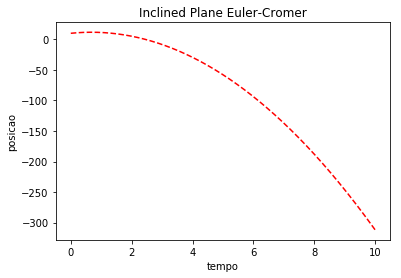

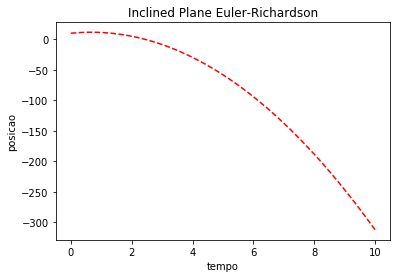

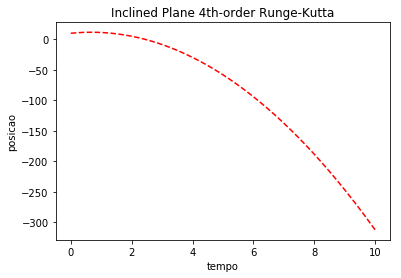

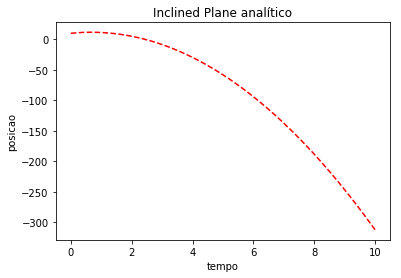

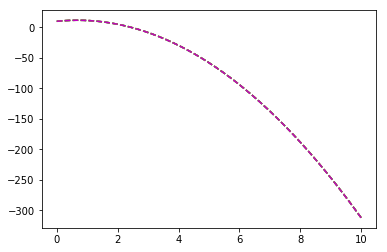

In [101]:
phenomenon='Inclined Plane'
#analise feita no eixo tangencial

#parameters

#gravity
g=9.8;

#tilt
theta=np.pi/6;

#k friction
mu=0.3;

#initial position, tangent to plane
xo=10;

#initial velocity, tangent to plane
vo=5;

#stepsize
dt=10**(-2);

#initial time
to=0;

#final time
tf=10;

init=np.array([xo,vo,to])




#function returning Derivative of state vector. 
def dx(x,t):
  a=-g*np.sin(theta)-np.sign(vo)*g*mu*np.cos(theta);
  vel=x[1];
  arr=np.array([]);
  arr=np.append(arr,vel);
  arr=np.append(arr,a);
  arr=np.append(arr,1);
  return arr;

    
sol=NDSolve(init,tf,dt,dx,'Euler');
sol2=NDSolve(init,tf,dt,dx,'Euler-Cromer');
sol3=NDSolve(init,tf,dt,dx,'Euler-Richardson');
sol4=NDSolve(init,tf,dt,dx,'RK4');

#analitic
def an(xo,vo,a,t):
  s=xo+vo*t+a*t**2/2;
  return s;


a=-g*np.sin(theta)-np.sign(vo)*g*mu*np.cos(theta);
solan=[[an(xo,vo,a,state[-1]),state[-1]] for state in sol]
  
#plot
showResults(sol,'tempo','posicao',phenomenon+' Euler');
showResults(sol2,'tempo','posicao',phenomenon+' Euler-Cromer');
showResults(sol3,'tempo','posicao',phenomenon+' Euler-Richardson');
showResults(sol4,'tempo','posicao',phenomenon+' 4th-order Runge-Kutta');
showResults(solan,'tempo','posicao',phenomenon+' analítico');
plt.plot([state[-1] for state in sol],[state[0] for state in sol],'r--',[state[-1] for state in sol2],[state[0] for state in sol2],'g--',
        [state[-1] for state in sol3],[state[0] for state in sol3],'c--',[state[-1] for state in sol4],[state[0] for state in sol4],'y--',
        [state[-1] for state in solan],[state[0] for state in solan],'m--'
        );



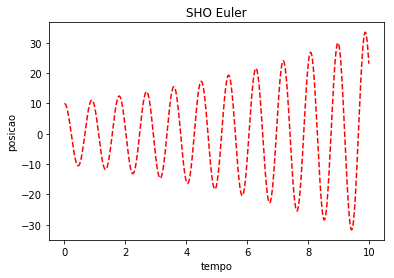

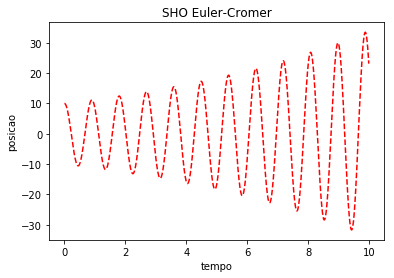

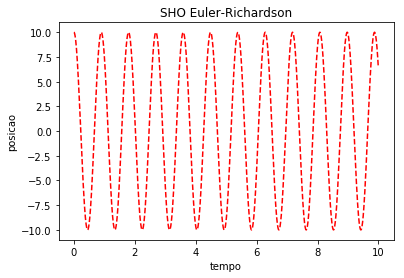

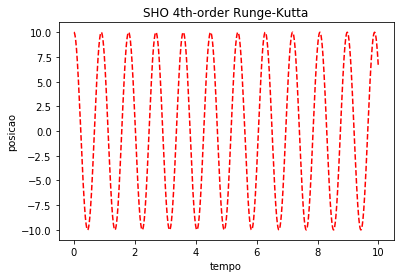

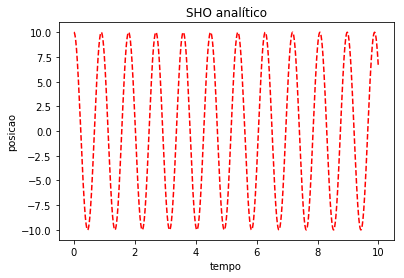

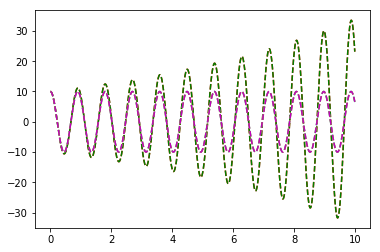

In [88]:
phenomenon='SHO' #Pendulum 


m=0.05; #mass
g=9.8; #gravity
l=0.2; #length
omega=np.sqrt(g/l); 
xo=10; #init pos
vo=0; #init v
dt=5*10**(-3); #stepsize
to=0; #init time
tf=10; #final time 
init=np.array([xo,vo,to]); #init state vector

def dx(x,t): #get derivatives function
  a=-(omega**2)*x[0];
  vel=x[1];
  arr=np.array([]);
  arr=np.append(arr,vel);
  arr=np.append(arr,a);
  arr=np.append(arr,1);
  return arr;

#solution through different methods

sol=NDSolve(init,tf,dt,dx,'Euler');
sol2=NDSolve(init,tf,dt,dx,'Euler-Cromer');
sol3=NDSolve(init,tf,dt,dx,'Euler-Richardson');
sol4=NDSolve(init,tf,dt,dx,'RK4');

#analitic
def an(xo,vo,t):
  A=np.sqrt(((m*(omega*xo)**2)+(m*vo**2))/(m*omega**2));
  return A*np.sin(omega*t+np.arcsin(xo/A));

solan=[[an(xo,vo,state[-1]),state[-1]] for state in sol]
  
#plot
showResults(sol,'tempo','posicao',phenomenon+' Euler');
showResults(sol2,'tempo','posicao',phenomenon+' Euler-Cromer');
showResults(sol3,'tempo','posicao',phenomenon+' Euler-Richardson');
showResults(sol4,'tempo','posicao',phenomenon+' 4th-order Runge-Kutta');
showResults(solan,'tempo','posicao',phenomenon+' analítico');
plt.plot([state[-1] for state in sol],[state[0] for state in sol],'r--',[state[-1] for state in sol2],[state[0] for state in sol2],'g--',
        [state[-1] for state in sol3],[state[0] for state in sol3],'c--',[state[-1] for state in sol4],[state[0] for state in sol4],'y--',
        [state[-1] for state in solan],[state[0] for state in solan],'m--'
        );



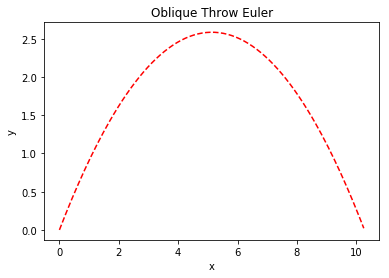

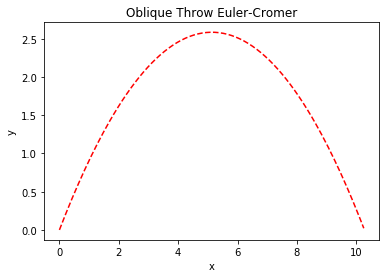

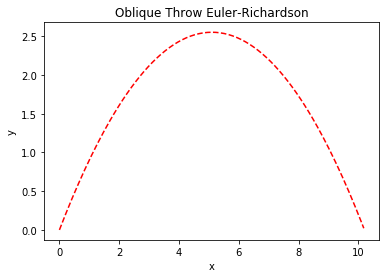

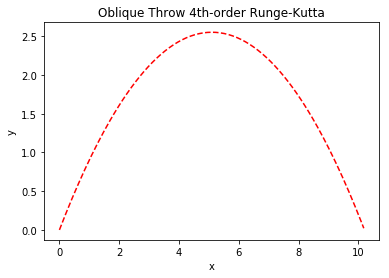

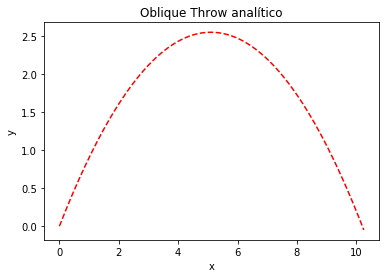

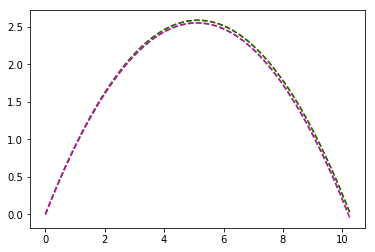

In [93]:
phenomenon='Oblique Throw'

g=9.8; #gravity
theta=np.pi/4; #tilt of initial v
xo=0; #init x pos
yo=0; #init y pos
vo=10; #init modulus of v
dt=10**(-2); #stepsize
to=0; #init time
tf=10; #final time 
vox=vo*np.cos(theta); #init vx
voy=vo*np.sin(theta); #init vy
init=np.array([xo,yo,vox,voy,to]); #init state vec

#get derivatives
def dx(x,t):
  ay=-g;
  vy=x[3];
  vx=x[2];
  arr=np.array([]);
  arr=np.append(arr,vx);
  arr=np.append(arr,vy);
  arr=np.append(arr,0);
  arr=np.append(arr,ay);
  arr=np.append(arr,1);
  return arr;

#when hit ground, stop integration
def whenevent(state):
  if state[1]>=0:
    return True;
  return False;

#solutions

sol=NDSolve(init,tf,dt,dx,'Euler',whenevent);
sol2=NDSolve(init,tf,dt,dx,'Euler-Cromer',whenevent);
sol3=NDSolve(init,tf,dt,dx,'Euler-Richardson',whenevent);
sol4=NDSolve(init,tf,dt,dx,'RK4',whenevent);

#analitic
def an(xo,yo,vox,voy,t):
  res=[];
  x=xo+vox*t;
  y=yo+voy*t-g*t**2/2;
  res.append(x);
  res.append(y);
  return res;

solan=[[an(xo,yo,vox,voy,state[-1])[0],an(xo,yo,vox,voy,state[-1])[1],state[-1]] for state in sol]

def showResults2(sol,xlabel,ylabel,title):
  plt.plot([state[0] for state in sol],[state[1] for state in sol],'r--');
  plt.xlabel(xlabel);
  plt.ylabel(ylabel);
  plt.title(title);
  plt.show();

#plot
showResults2(sol,'x','y',phenomenon+' Euler');
showResults2(sol2,'x','y',phenomenon+' Euler-Cromer');
showResults2(sol3,'x','y',phenomenon+' Euler-Richardson');
showResults2(sol4,'x','y',phenomenon+' 4th-order Runge-Kutta');
showResults2(solan,'x','y',phenomenon+' analítico');

plt.plot([state[0] for state in sol],[state[1] for state in sol],'r--',[state[0] for state in sol2],[state[1] for state in sol2],'g--',
        [state[0] for state in sol3],[state[1] for state in sol3],'c--',[state[0] for state in sol4],[state[1] for state in sol4],'y--',
        [state[0] for state in solan],[state[1] for state in solan],'m--'
        );


[[1.0, 0.7853981633974483, 0.0], [1.0, 0.7953981633974483, 0.01], [1.0, 0.8053981633974483, 0.02], [1.0, 0.8153981633974483, 0.03], [1.0, 0.8253981633974483, 0.04], [1.0, 0.8353981633974483, 0.05], [1.0, 0.8453981633974483, 0.060000000000000005], [1.0, 0.8553981633974483, 0.07], [1.0, 0.8653981633974482, 0.08], [1.0, 0.8753981633974482, 0.09], [1.0, 0.8853981633974483, 0.09999999999999999], [1.0, 0.8953981633974483, 0.10999999999999999], [1.0, 0.9053981633974483, 0.11999999999999998], [1.0, 0.9153981633974483, 0.12999999999999998], [1.0, 0.9253981633974483, 0.13999999999999999], [1.0, 0.9353981633974483, 0.15], [1.0, 0.9453981633974483, 0.16], [1.0, 0.9553981633974483, 0.17], [1.0, 0.9653981633974483, 0.18000000000000002], [1.0, 0.9753981633974483, 0.19000000000000003], [1.0, 0.9853981633974483, 0.20000000000000004], [1.0, 0.9953981633974484, 0.21000000000000005], [1.0, 1.0053981633974483, 0.22000000000000006], [1.0, 1.0153981633974483, 0.23000000000000007], [1.0, 1.0253981633974483, 0

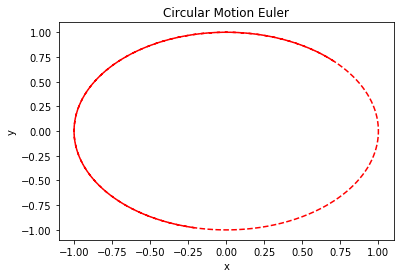

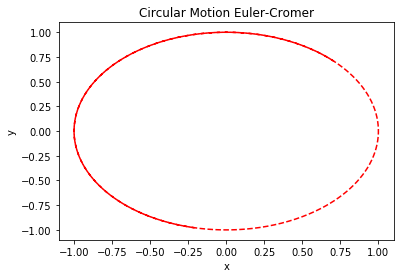

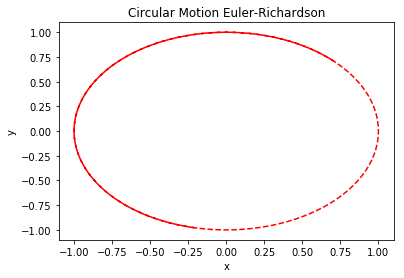

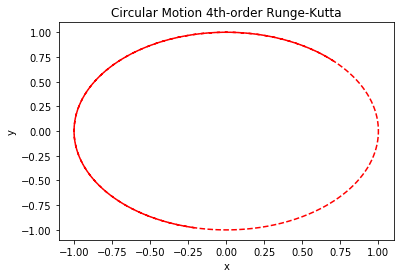

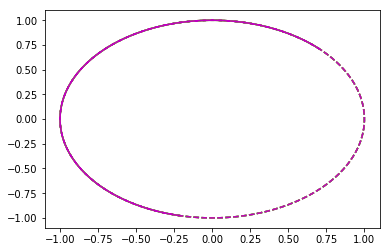

In [115]:
phenomenon='Circular Motion'


thetao=np.pi/4; #initial angle
ro=1; #initial radius
vro=0; #in mcu, radial velocity is always null
vthetao=1; #init angular velocity
dt=10**(-2); #stepsize
to=0; #init time
tf=10; #final time
init=np.array([ro,vro,thetao,vthetao,to]); #init state vec

#get derivatives
def dx(x,t):
  arr=np.array([]);
  arr=np.append(arr,x[1]);
  arr=np.append(arr,0);   #acceleration neither in radial, nor azimuthal direction
  arr=np.append(arr,x[3]);
  arr=np.append(arr,0);
  arr=np.append(arr,1);
  return arr;

#solutions
sol=NDSolve(init,tf,dt,dx,'Euler');
sol2=NDSolve(init,tf,dt,dx,'Euler-Cromer');
sol3=NDSolve(init,tf,dt,dx,'Euler-Richardson');
sol4=NDSolve(init,tf,dt,dx,'RK4');

#analitic
def an(ro,vro,thetao,vthetao,t):
  res=[];
  r=ro+vro*t;
  theta=thetao + vthetao*t;
  res.append(r);
  res.append(theta);
  return res;

solan=[[an(ro,vro,thetao,vthetao,state[-1])[0]
        ,an(ro,vro,thetao,vthetao,state[-1])[1]
        ,state[-1]] for state in sol]

print(solan)

def showResults2(sol,xlabel,ylabel,title):
  plt.plot([state[0]*np.cos(state[2]) for state in sol],[state[0]*np.sin(state[2]) for state in sol],'r--');
  plt.xlabel(xlabel);
  plt.ylabel(ylabel);
  plt.title(title);
  plt.show();

#plot
showResults2(sol,'x','y',phenomenon+' Euler');
showResults2(sol2,'x','y',phenomenon+' Euler-Cromer');
showResults2(sol3,'x','y',phenomenon+' Euler-Richardson');
showResults2(sol4,'x','y',phenomenon+' 4th-order Runge-Kutta');

plt.plot([state[0]*np.cos(state[2]) for state in sol],[state[0]*np.sin(state[2]) for state in sol],'r--',[state[0]*np.cos(state[2]) for state in sol2],[state[0]*np.sin(state[2]) for state in sol2],'g--',
        [state[0]*np.cos(state[2]) for state in sol3],[state[0]*np.sin(state[2]) for state in sol3],'c--',[state[0]*np.cos(state[2]) for state in sol4],[state[0]*np.sin(state[2]) for state in sol4],'y--',
        [state[0]*np.cos(state[1]) for state in solan],[state[0]*np.sin(state[1]) for state in solan],'m--'
        );